# Accumulated Local Effects examples
This script serves to demonstrate how the ale AccumulatedLocalEffects can be used.

## Importing the AccumulatedLocalEffects class

In [3]:
from ale import AccumulatedLocalEffects

## Importing the example data sets

In [6]:
import numpy as np

# Training data sets
X_train = np.load('data/EXAMPLE_X_train.npy')
y_train = np.load('data/EXAMPLE_y_train.npy')

# Test data sets
X_test = np.load('data/EXAMPLE_X_test.npy')
y_test = np.load('data/EXAMPLE_y_test.npy')

## Initializing the a regressor
Works best for histogram based gradient boosters, because they usually don't take too much time for fitting. The class should work for any regressor, particularly the following three were tested:
* [LightGBM regressor](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html)
* [XGBoost regressor](https://xgboost.readthedocs.io/en/latest/python/python_api.html)
* [sklearn HistGradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html)

In [7]:
from lightgbm import LGBMRegressor

reg = LGBMRegressor(objective='cross_entropy',
                    learning_rate=0.1,
                    n_estimators=300,
                    num_leaves=100,
                    max_depth=-1,
                    random_state=1)

## Instance of the AccumulatedLocalEffects class

In [8]:
ALE = AccumulatedLocalEffects(reg=reg, 
                              filename='SET03',
                              X_train=SET03_X_train, 
                              y_train=SET03_y_train, 
                              num_illum=4, 
                              num_wlen=16)

## Obtaining the feature indices sorted by importance
... by sorting the total variations of the accumulated local effects function for the first illumination position.

In [ ]:
ALE.feature_importance_indices(illum_pos=[1])

... by sorting the sum of total variations of the accumulated local effects function over all illumination positions.

In [ ]:
ALE.feature_importance_indices(illum_pos=[0, 1, 2, 3])

## Plotting the ALE function
... for the features corresponding to the first illumination position, including the 0.1, 0.2, ..., 0.9 quantiles of the empirical distribution functions as x-axis ticks.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


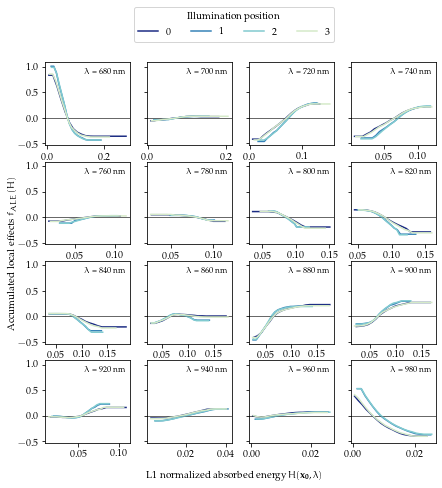

In [9]:
ALE.plot_ALE_function(illum_pos=[1])

... for each feature, i.e. every wavelength and illumnation position.

In [ ]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

## Plotting the 'feature clipping' MAE-progressions
... with the clipping orders 'importance' (features clipped according to the feature importance indices determined by looking at the first illumination position), and 'uniformal' (features clipped uniformally).

In [ ]:
stats = ALE.plot_feature_clipping(SET03_X_test, 
                                  SET03_y_test,
                                  illum_pos=[1],
                                  clipping_order=['importance', 'uniformal'])

[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]
[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]
[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]
[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]
[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]
[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]
[ 1  5  4 14 13 12  9  8  6 11  7  3 10  2 15  0]


Printing the statistics for the two clipping orders 
* columns = {n=1 feature used, n=2 features used, ... , n=16 features used}
* rows = {feature index, 10th percentile, 25th percentile, median, 75th percentile, 90th percentile})

In [ ]:
print(stats['importance'])
print(stats['uniformal'])